In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [145]:
df = pd.read_csv('sample-playlist-audio-features.csv')
df1 = df.iloc[:19]
df2 = df.iloc[19:]
print(df1.shape[0])
print(df2.shape[0])

19
18


# Number of Songs

In [146]:
df1.shape[0]
df2.shape[0]
def showNumSongs(playlistDf1, playlistName1, playlistDf2, PlaylistName2):    
    output = f'The number of songs in {playlistName1} is {playlistDf1.shape[0]}, while the number of songs in {PlaylistName2} is {playlistDf2.shape[0]}'
    return output

showNumSongs(df1, 'playlist 1', df2, 'playlist 2')


'The number of songs in playlist 1 is 19, while the number of songs in playlist 2 is 18'

# How Alive is Your Playlist?

In [147]:
def spiderwebAlivenessCompVis(playlistDf1, playlistName1, playlistDf2, PlaylistName2):

    categories = ['Danceability', 'Energy', 'Liveness', 'Valence']
    fig = go.Figure()

    r1 = playlistDf1[['Danceability', 'Energy', 'Liveness', 'Valence']].mean()
    r2 = playlistDf2[['Danceability', 'Energy', 'Liveness', 'Valence']].mean()
    

    fig.add_trace(go.Scatterpolar(
        r=r1,
        theta=categories,
        fill='toself',
        name=playlistName1
    ))
    fig.add_trace(go.Scatterpolar(
        r=r2,
        theta=categories,
        fill='toself',
        name=PlaylistName2
    ))
    
    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 1]
        )),
    showlegend=True
    )

    fig.show()

In [148]:
spiderwebAlivenessCompVis(df1,"Playlist 1", df2, "Playlist 2")

# How Technical is your playlist?

In [149]:


def spiderwebTechnicalityCompVis(playlistDf1, playlistName1, playlistDf2, PlaylistName2):

    categories = ['Acousticness', 'Instrumentalness', 'Speechiness', 'Liveness']
    fig = go.Figure()

    r1 = playlistDf1[['Acousticness', 'Instrumentalness', 'Speechiness','Liveness']].mean()
    r2 = playlistDf2[['Acousticness', 'Instrumentalness', 'Speechiness','Liveness']].mean()
    

    fig.add_trace(go.Scatterpolar(
        r=r1,
        theta=categories,
        fill='toself',
        name=playlistName1
    ))
    fig.add_trace(go.Scatterpolar(
        r=r2,
        theta=categories,
        fill='toself',
        name=PlaylistName2
    ))
    
    fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=[0, 1]
        )),
    showlegend=True
    )

    fig.show()

In [150]:
spiderwebTechnicalityCompVis(df1,"Playlist 1", df2, "Playlist 2")

# Playlist Song Key's

In [151]:
def keyComparison(playlistDf1, playlistName1, playlistDf2, PlaylistName2):
    keys1T = dict(zip(range(0,11), [0]*11))
    keys2T = dict(zip(range(0,11), [0]*11))
    for vals in playlistDf1.Key:
        keys1T[vals] += 1
    for vals in playlistDf2.Key:
        keys2T[vals] += 1
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.barplot(x=range(0,11),y=keys1T.values(), hue = range(0,11), legend=False, ax = ax1)
    sns.barplot(x=range(0,11),y=keys2T.values(), hue = range(0,11), legend=True, ax = ax2)
    ax1.set(xlabel='Musical Key', ylabel='Frequency', title = f'Keys of {playlistName1}')
    ax2.set(xlabel='Musical Key', title = f'Keys of {PlaylistName2}')


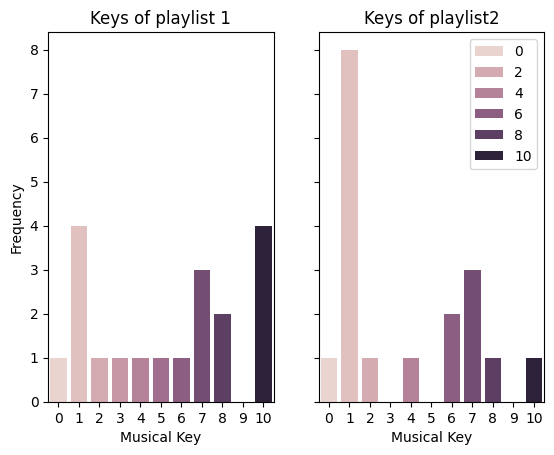

In [152]:
keyComparison(df1, 'playlist 1', df2, 'playlist2')

# Tempo Distribution

In [153]:
def tempDistr(playlistDf1, playlistName1, playlistDf2, PlaylistName2):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.kdeplot(data=playlistDf1, x='Tempo', fill=True, ax = ax1, color = 'blue')
    sns.kdeplot(data=playlistDf2, x='Tempo', fill=True, ax = ax2, color= 'red')
    ax1.set(xlabel='Tempo (BPM)', ylabel='Density', title = f'Tempo of {playlistName1}')
    ax2.set(xlabel='Tempo (BPM)', title = f'Tempo of {PlaylistName2}')


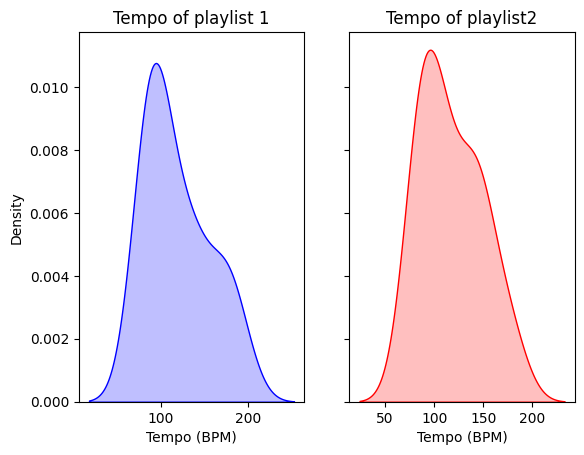

In [154]:
tempDistr(df1, 'playlist 1', df2, 'playlist2')

### Avg Tempo

In [155]:
def showAvgTempos(playlistDf1, playlistName1, playlistDf2, PlaylistName2):    
    output = f'The average tempo of {playlistName1} is {playlistDf1.Tempo.mean()}, while the average temp of {PlaylistName2} is {playlistDf2.Tempo.mean()}'
    return output

showAvgTempos(df1, 'playlist 1', df2, 'playlist2')




'The average tempo of playlist 1 is 119.17373684210526, while the average temp of playlist2 is 117.36283333333333'